In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
df = pd.read_json('data/cian_data_processed.json')
df.shape

(840, 9)

In [25]:
df.head()


,cityId,city_name,disctrict_name,district_id,lat,lng,price,space,url
0,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,37785696,139.74,https://spb.cian.ru/sale/flat/267463355/
1,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,28985885,86.69,https://spb.cian.ru/sale/flat/267463413/
2,2,Санкт-Петербург,Василеостровский,149,59.943773,30.268641,53836858,156.23,https://spb.cian.ru/sale/flat/267463457/
3,2,Санкт-Петербург,Красногвардейский,144,59.930475,30.404556,40237764,148.30,https://spb.cian.ru/sale/flat/266455905/
4,2,Санкт-Петербург,Центральный,133,59.934641,30.360541,13500000,71.30,https://spb.cian.ru/sale/flat/264091500/


In [26]:
df['per_meter'] = df['price'] / df['space']

In [27]:
df.head()

,cityId,city_name,disctrict_name,district_id,lat,lng,price,space,url,per_meter
0,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,37785696,139.74,https://spb.cian.ru/sale/flat/267463355/,270400.000000
1,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,28985885,86.69,https://spb.cian.ru/sale/flat/267463413/,334362.498558
2,2,Санкт-Петербург,Василеостровский,149,59.943773,30.268641,53836858,156.23,https://spb.cian.ru/sale/flat/267463457/,344600.000000
3,2,Санкт-Петербург,Красногвардейский,144,59.930475,30.404556,40237764,148.30,https://spb.cian.ru/sale/flat/266455905/,271326.797033
4,2,Санкт-Петербург,Центральный,133,59.934641,30.360541,13500000,71.30,https://spb.cian.ru/sale/flat/264091500/,189340.813464


In [28]:
bins = df.groupby('disctrict_name').mean()['per_meter'].shape[0]
df.groupby('disctrict_name').mean()['price']

disctrict_name
Адмиралтейский       3.019755e+07
Василеостровский     2.398501e+07
Выборгский           1.630707e+07
Калининский          1.081007e+07
Кировский            1.128856e+07
Колпинский           8.138600e+06
Красногвардейский    1.517747e+07
Красносельский       9.611872e+06
Кронштадтский        5.900000e+06
Курортный            2.489271e+07
Московский           1.731166e+07
Невский              1.135556e+07
Петроградский        8.417410e+07
Петродворцовый       8.363787e+06
Приморский           1.580314e+07
Пушкинский           9.564913e+06
Фрунзенский          1.142899e+07
Центральный          4.579248e+07
Name: price, dtype: float64

In [29]:
districts = df.groupby('disctrict_name').mean()['price'].keys()
prices = df.groupby('disctrict_name').mean()['price'].values / 10**6
label_fontsize = 22
params = {'legend.fontsize': 'large',
          'figure.figsize': (10,25),
          'axes.labelsize': label_fontsize,
          'axes.titlesize': label_fontsize,
          'xtick.labelsize': label_fontsize*0.75,
          'ytick.labelsize': label_fontsize*0.75,
          'axes.titlepad': 25}


In [30]:
def plot_disctrict_bar_statistic(district_names, district_value,
                                 bar_title: str, x_label: str, y_label: str,
                                 params: dict, save_name: str):
       

        plt.rcParams.update(params)
        sns.set_style('darkgrid')
        bar = sns.barplot(x=district_value, y=district_names)
        bar.set(xlabel=x_label, ylabel=y_label, title=bar_title)
        plt.bar_label(bar.containers[0], fmt='%.2f')      
        plt.savefig(save_name, bbox_inches='tight')

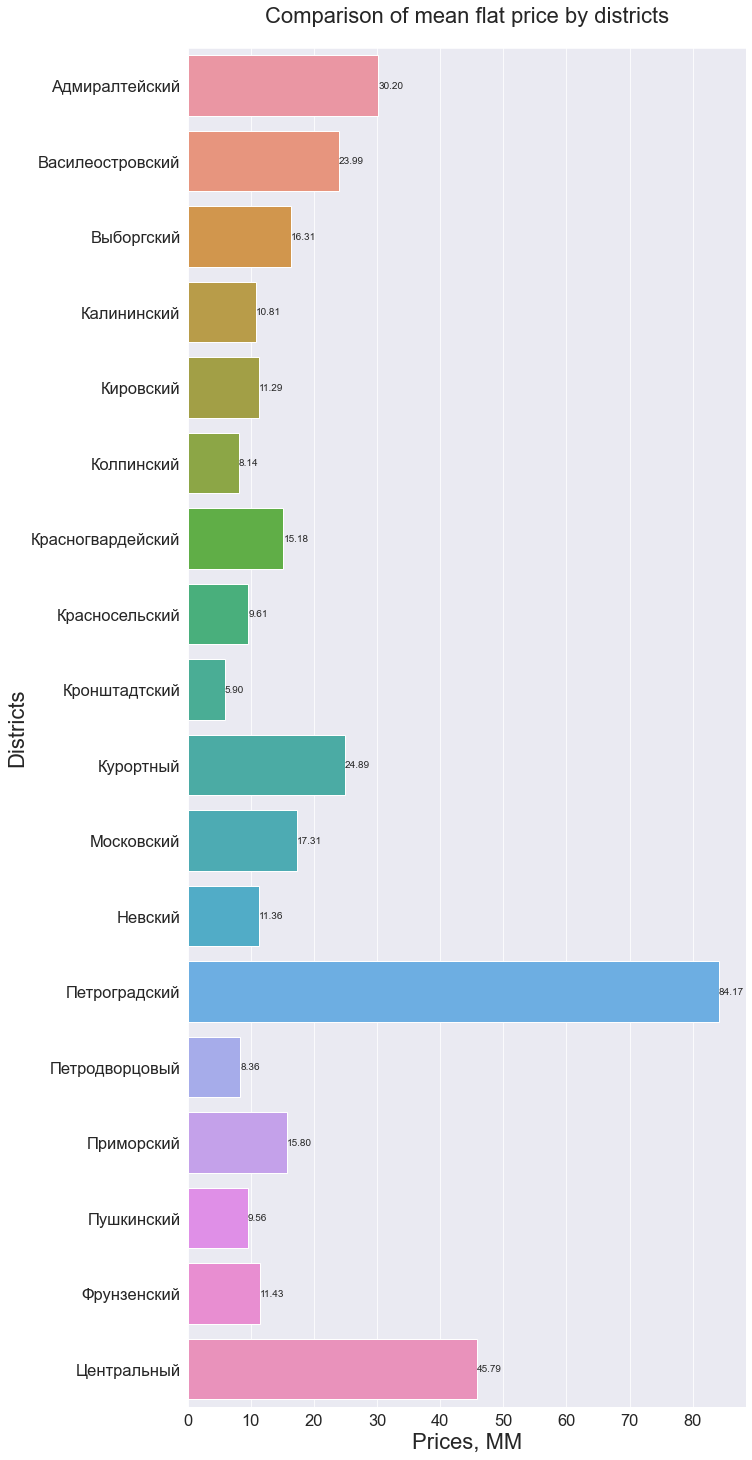

In [31]:
plot_disctrict_bar_statistic(districts, prices,
                             bar_title='Comparison of mean flat price by districts',
                             x_label='Prices, MM',
                             y_label='Districts',
                             params=params,
                             save_name='output/price.png')

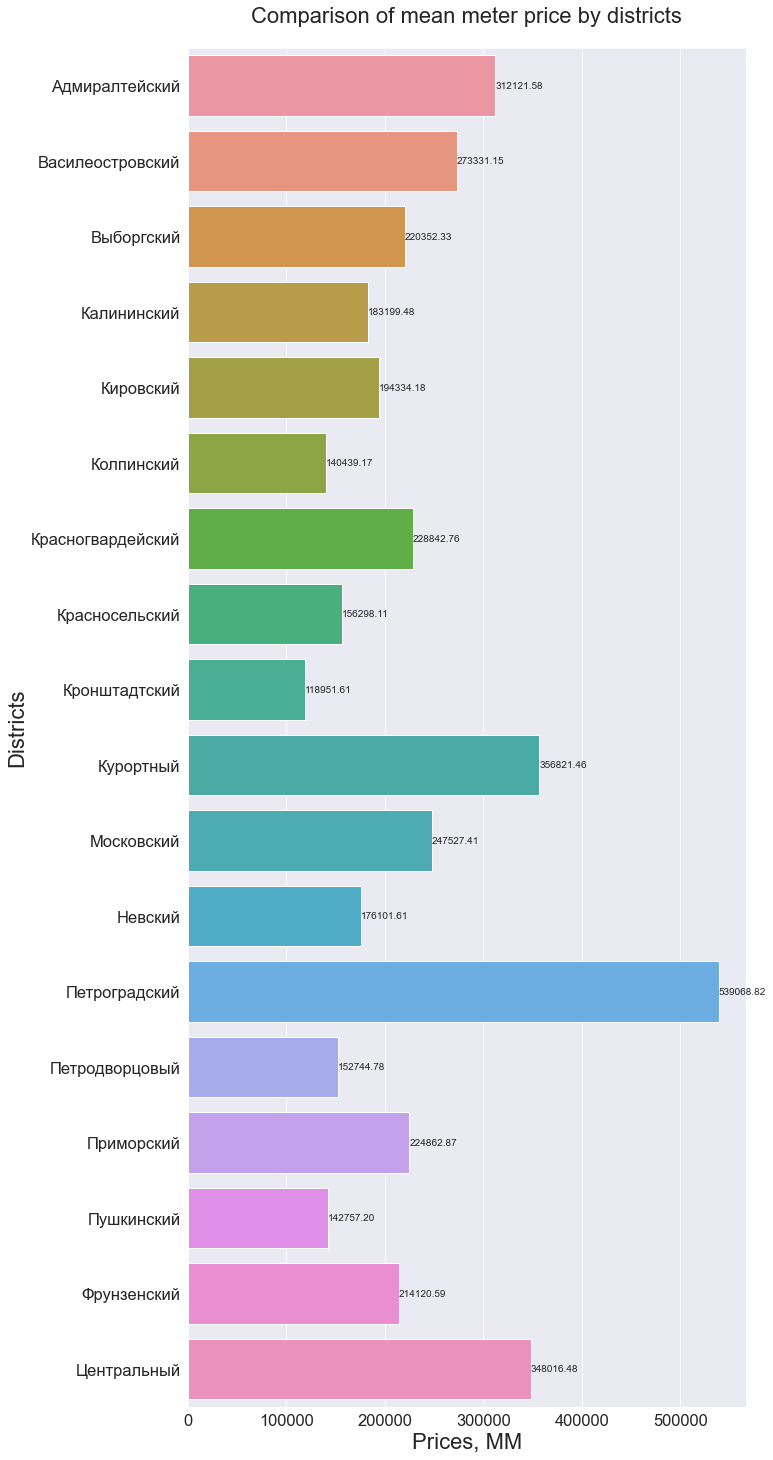

In [32]:
meter_prices = df.groupby('disctrict_name').mean()['per_meter'].values

plot_disctrict_bar_statistic(districts, meter_prices,
                             bar_title='Comparison of mean meter price by districts',
                             x_label='Prices, MM',
                             y_label='Districts',
                             params=params,
                             save_name='output/meter_price.png')

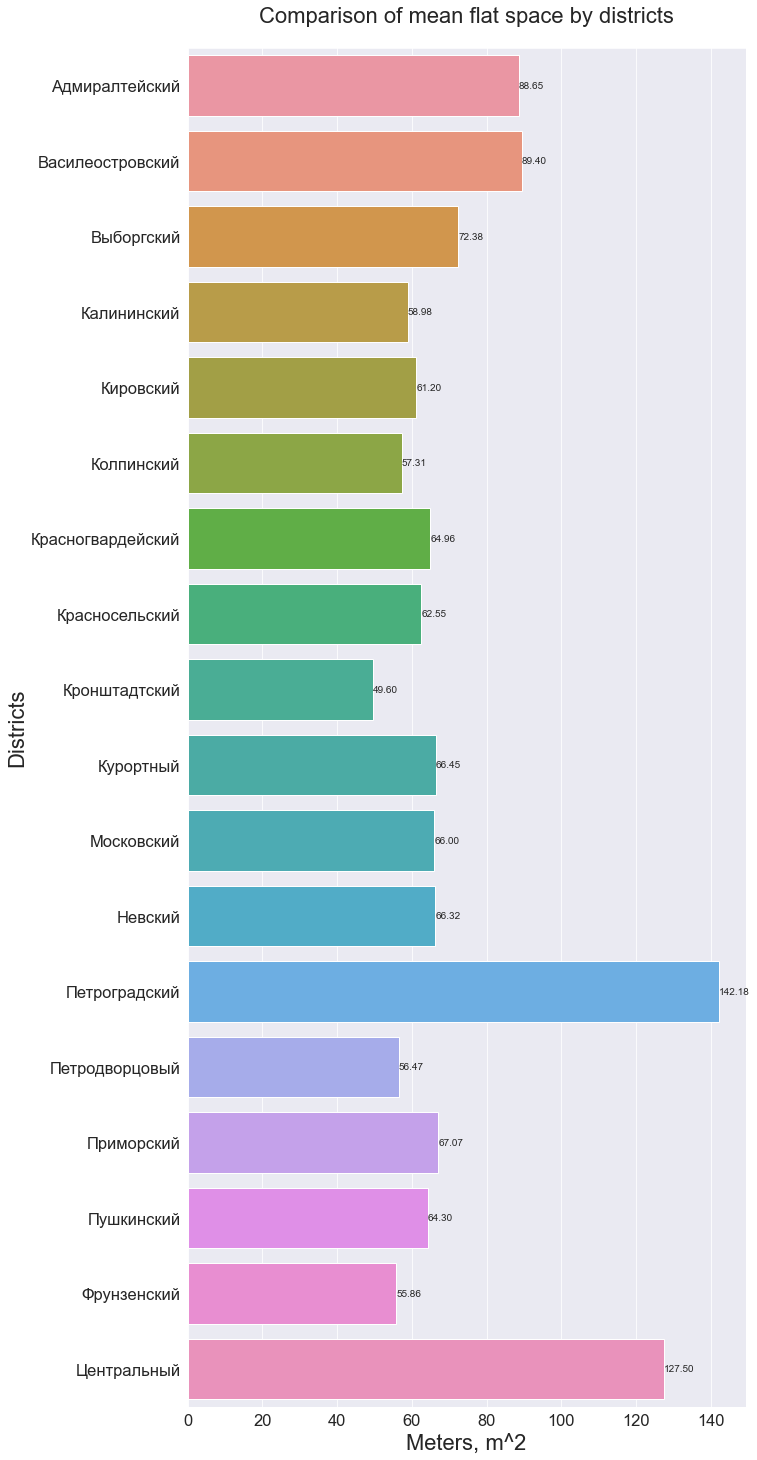

In [33]:
spaces = df.groupby('disctrict_name').mean()['space'].values

plot_disctrict_bar_statistic(districts, spaces,
                             bar_title='Comparison of mean flat space by districts',
                             x_label='Meters, m^2',
                             y_label='Districts',
                             params=params,
                             save_name='output/space.png')

In [225]:
from scipy.interpolate import LinearNDInterpolator, Rbf

In [226]:
def get_boundaries(df):
    right = df['lng'].max()
    left = df['lng'].min()
    top = df['lat'].max()
    bottom = df['lat'].min()
    return (right, left, top, bottom)

In [16]:
from data_fetching.map_fetcher import getImageCluster

from PIL import Image

spb_coords = get_boundaries(df)
a = (spb_coords[0] + spb_coords[1]) / 2
b = (spb_coords[2] + spb_coords[3]) / 2
spb_map = getImageCluster(b, a, 0.04,  0.01, 8)
x = df['lng']
y = df['lat']

_, ax = plt.subplots(figsize=(9,9))

ax.scatter(x, y, zorder=2, )
ax.imshow(np.asarray(spb_map), zorder=1)
# plt.savefig('dots.png')
plt.show()


ModuleNotFoundError: No module named 'data_fetching'

In [ ]:
30.1615825, 59.9305475

In [47]:
t = df['per_meter']
xmax = t.max()
xmin = t.min()
norm = lambda x: (x - xmin)/ (xmax - xmin)

interval_min = 1
interval_max = 10
scaled_mat = lambda x: (x - xmin) / (xmax - xmin) * (interval_max - interval_min) + interval_min
t = t.apply(scaled_mat)

In [48]:
t

0      1.506159
1      1.180127
2      1.928860
3      1.567769
4      1.484643
         ...   
555    1.312591
556    1.277004
557    1.931691
558    1.334759
559    1.635053
Name: per_meter, Length: 560, dtype: float64

In [51]:
df.groupby('disctrict_name').mean()['per_meter'].sort_values(ascending=False)

disctrict_name
Петроградский        532546.496714
Курортный            370363.601464
Центральный          360935.512695
Адмиралтейский       318437.722086
Василеостровский     285951.465872
Выборгский           258090.979531
Московский           256649.583029
Красногвардейский    243342.989980
Кировский            237984.189811
Приморский           235172.071125
Фрунзенский          191347.410231
Калининский          189900.963129
Невский              178414.238869
Красносельский       164870.313062
Пушкинский           158825.025378
Name: per_meter, dtype: float64

In [55]:
df.groupby('disctrict_name').mean()

,cityId,district_id,lat,lng,price,space,per_meter
disctrict_name,,,,,,,
Адмиралтейский,2.0,150.0,59.910548,30.305901,3.316332e+07,92.671765,318437.722086
Василеостровский,2.0,149.0,59.940960,30.234278,2.646877e+07,92.904773,285951.465872
Выборгский,2.0,148.0,60.007678,30.328982,2.034469e+07,78.197021,258090.979531
Калининский,2.0,147.0,60.008749,30.386152,1.274697e+07,66.430000,189900.963129
Кировский,2.0,146.0,59.900866,30.258919,1.402775e+07,59.505000,237984.189811
Красногвардейский,2.0,144.0,59.945799,30.427318,1.657541e+07,66.911200,243342.989980
Красносельский,2.0,143.0,59.836623,30.142040,1.060280e+07,66.887500,164870.313062
Курортный,2.0,141.0,60.145562,29.881390,2.922444e+07,72.666667,370363.601464
Московский,2.0,140.0,59.863212,30.328337,1.836090e+07,65.840889,256649.583029


In [10]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[59.9305475, 30.1615825], zoom_start = 11)
lat = df.groupby('disctrict_name').mean()['lat'].to_list()
long = df.groupby('disctrict_name').mean()['lng'].to_list()
price = df.groupby('disctrict_name').mean()['per_meter'].to_list()

HeatMap(list(zip(lat, long, price)), blur = 25).add_to(map)

In [11]:
map

In [26]:
df.groupby('disctrict_name').mean()['per_meter'].sort_values(ascending=False)

disctrict_name
Петроградский        532546.496714
Курортный            370363.601464
Центральный          360935.512695
Адмиралтейский       318437.722086
Василеостровский     285951.465872
Выборгский           258090.979531
Московский           256649.583029
Красногвардейский    243342.989980
Кировский            237984.189811
Приморский           235172.071125
Фрунзенский          191347.410231
Калининский          189900.963129
Невский              178414.238869
Красносельский       164870.313062
Пушкинский           158825.025378
Name: per_meter, dtype: float64

In [41]:
l = df['per_meter'].values
lower, upper = 0.5, 5
l_norm = [lower + (upper - lower) * x for x in l]
print(l[0])
l_norm[0]

270400.0


1216800.5

In [35]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[59.9305475, 30.1615825], zoom_start = 11)
lat = df['lat'].to_list()
long = df['lng'].to_list()
price = df['per_meter'].transform(lambda x: np.log2(x)).to_list()

HeatMap(list(zip(lat, long, price)), radius=7, blur = 10).add_to(map)
map

In [19]:
from data_processing.visualization import get_map_center
import branca.colormap as cm

center = get_map_center(df)
min_price = df.groupby('disctrict_name').mean()['per_meter'].min()
max_price = df.groupby('disctrict_name').mean()['per_meter'].max()
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)
m = folium.Map(location=(center[1], center[0]), zoom_start=10, )

for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['lat'], df.iloc[i]['lng']],
        radius=10,
        fill=True,
        color=colormap(df.iloc[i]['per_meter']),
        fill_opacity=0.2,
        png_enabled = True
    ).add_to(m)
m.add_child(colormap)
m



In [33]:
center = get_map_center(df)
center

(30.105233629638498, 59.9305475)

In [22]:
print(m._repr_png_())

None


In [23]:
import io
from PIL import Image

img_data = m._to_png()
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

ModuleNotFoundError: No module named 'selenium'